In [1]:
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline

In [2]:
df = pd.read_excel('Sales.xlsx', sheet_name ='Sales')

In [3]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [4]:
df.drop('CustID', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4251 non-null   float64
 2   CustTenure            4294 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4475 non-null   float64
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4284 non-null   float64
 12  Complaint             4520 non-null   int64  
 13  ExistingPolicyTenure  4336 non-null   float64
 14  SumAssured            4366 non-null   float64
 15  Zone                 

In [6]:
df.describe(include = 'all')

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
count,4520.000000,4251.000000,4294.000000,4520,4520,4520,4520,4520.000000,4520,4475.000000,4520,4284.000000,4520.000000,4336.000000,4.366000e+03,4520,4520,4520.000000,4468.000000
unique,NaN,NaN,NaN,3,5,7,3,NaN,6,NaN,4,NaN,NaN,NaN,NaN,4,4,NaN,NaN
top,NaN,NaN,NaN,Agent,Salaried,Graduate,Male,NaN,Manager,NaN,Married,NaN,NaN,NaN,NaN,West,Half Yearly,NaN,NaN
freq,NaN,NaN,NaN,3194,2192,1870,2688,NaN,1620,NaN,2268,NaN,NaN,NaN,NaN,2566,2656,NaN,NaN
mean,4077.838274,14.494707,14.469027,NaN,NaN,NaN,NaN,3.688938,NaN,3.565363,NaN,22890.309991,0.287168,4.130074,6.199997e+05,NaN,NaN,4.626991,3.067592
std,1403.321711,9.037629,8.963671,NaN,NaN,NaN,NaN,1.015769,NaN,1.455926,NaN,4885.600757,0.452491,3.346386,2.462348e+05,NaN,NaN,3.620132,1.382968
min,1605.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,16009.000000,0.000000,1.000000,1.685360e+05,NaN,NaN,0.000000,1.000000
25%,3027.750000,7.000000,7.000000,NaN,NaN,NaN,NaN,3.000000,NaN,2.000000,NaN,19683.500000,0.000000,2.000000,4.394432e+05,NaN,NaN,2.000000,2.000000
50%,3911.500000,13.000000,13.000000,NaN,NaN,NaN,NaN,4.000000,NaN,4.000000,NaN,21606.000000,0.000000,3.000000,5.789765e+05,NaN,NaN,3.000000,3.000000
75%,4867.250000,20.000000,20.000000,NaN,NaN,NaN,NaN,4.000000,NaN,5.000000,NaN,24725.000000,1.000000,6.000000,7.582360e+05,NaN,NaN,8.000000,4.000000


In [7]:
df.ExistingProdType = df.ExistingProdType.astype(object)

In [8]:
df.Complaint = df.Complaint.astype(object)

In [9]:
df.CustCareScore = df.CustCareScore.astype(object)

In [10]:
df.NumberOfPolicy = df.NumberOfPolicy.astype(object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4251 non-null   float64
 2   CustTenure            4294 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   object 
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4475 non-null   object 
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4284 non-null   float64
 12  Complaint             4520 non-null   object 
 13  ExistingPolicyTenure  4336 non-null   float64
 14  SumAssured            4366 non-null   float64
 15  Zone                 

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and 

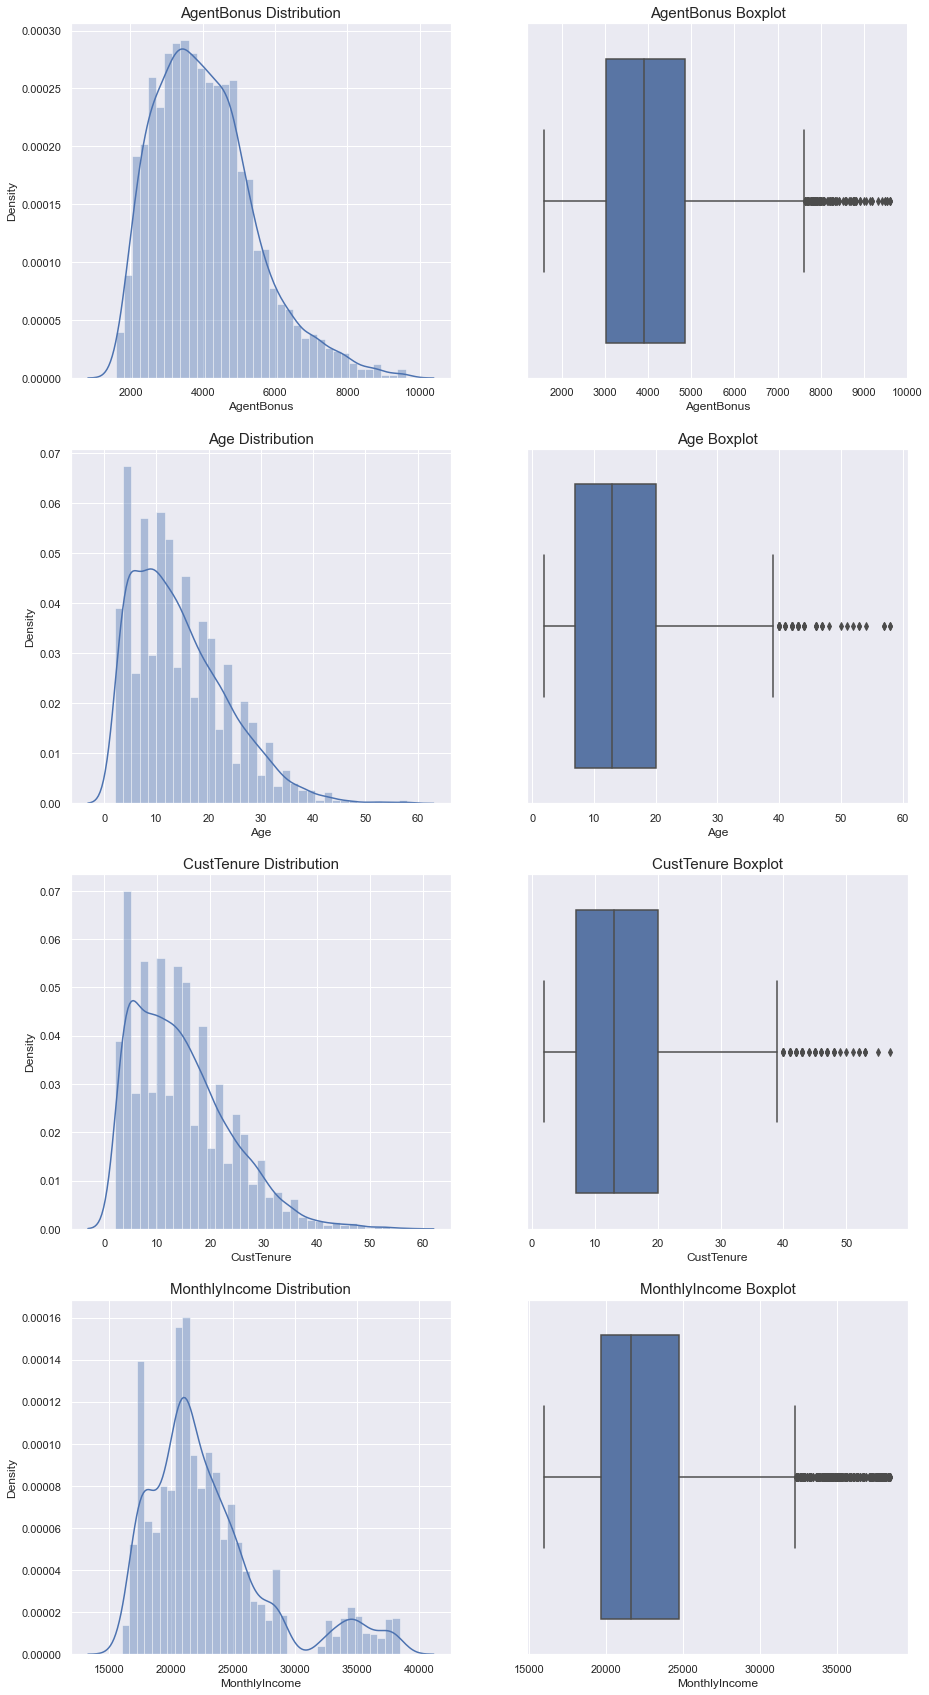

In [12]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,30)
a = sns.distplot(df['AgentBonus'] , ax=axes[0][0])
a.set_title("AgentBonus Distribution",fontsize=15)

a = sns.boxplot(df['AgentBonus'] , orient = "v" , ax=axes[0][1])
a.set_title("AgentBonus Boxplot",fontsize=15)

a = sns.distplot(df['Age'] , ax=axes[1][0])
a.set_title("Age Distribution",fontsize=15)

a = sns.boxplot(df['Age'] , orient = "v" , ax=axes[1][1])
a.set_title("Age Boxplot",fontsize=15)


a = sns.distplot(df['CustTenure'] , ax=axes[2][0])
a.set_title("CustTenure Distribution",fontsize=15)

a = sns.boxplot(df['CustTenure'] , orient = "v" , ax=axes[2][1])
a.set_title("CustTenure Boxplot",fontsize=15)


a = sns.distplot(df['MonthlyIncome'] , ax=axes[3][0])
a.set_title("MonthlyIncome Distribution",fontsize=15)

a = sns.boxplot(df['MonthlyIncome'] , orient = "v" , ax=axes[3][1])
a.set_title("MonthlyIncome Boxplot",fontsize=15)

plt.show();

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and 

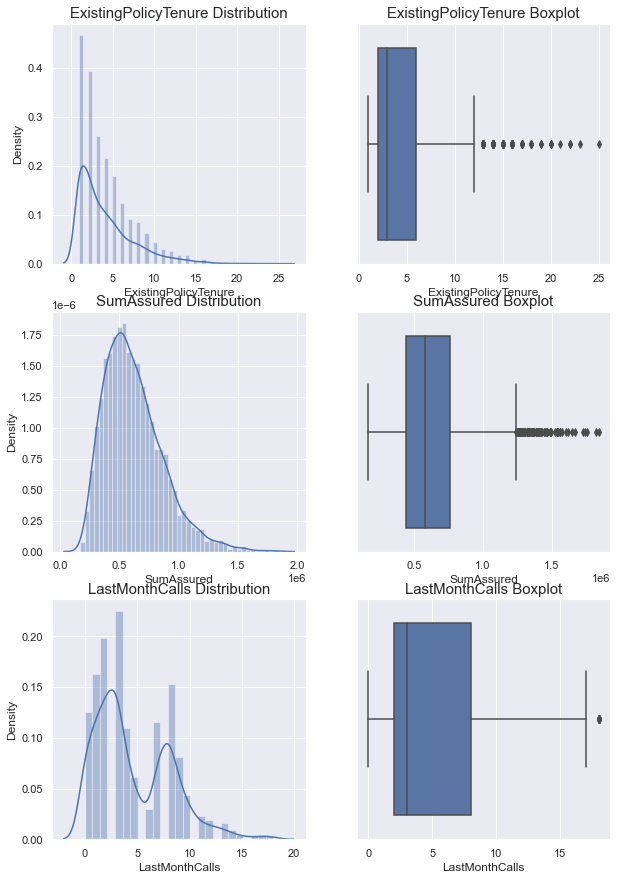

In [13]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,15)

a = sns.distplot(df['ExistingPolicyTenure'] , ax=axes[0][0])
a.set_title("ExistingPolicyTenure Distribution",fontsize=15)

a = sns.boxplot(df['ExistingPolicyTenure'] , orient = "v" , ax=axes[0][1])
a.set_title("ExistingPolicyTenure Boxplot",fontsize=15)


a = sns.distplot(df['SumAssured'] , ax=axes[1][0])
a.set_title('SumAssured Distribution',fontsize=15)

a = sns.boxplot(df['SumAssured'] , orient = "v" , ax=axes[1][1])
a.set_title("SumAssured Boxplot",fontsize=15)


a = sns.distplot(df['LastMonthCalls'] , ax=axes[2][0])
a.set_title("LastMonthCalls Distribution",fontsize=15)

a = sns.boxplot(df['LastMonthCalls'] , orient = "v" , ax=axes[2][1])
a.set_title("LastMonthCalls Boxplot",fontsize=15)

plt.show();

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\si

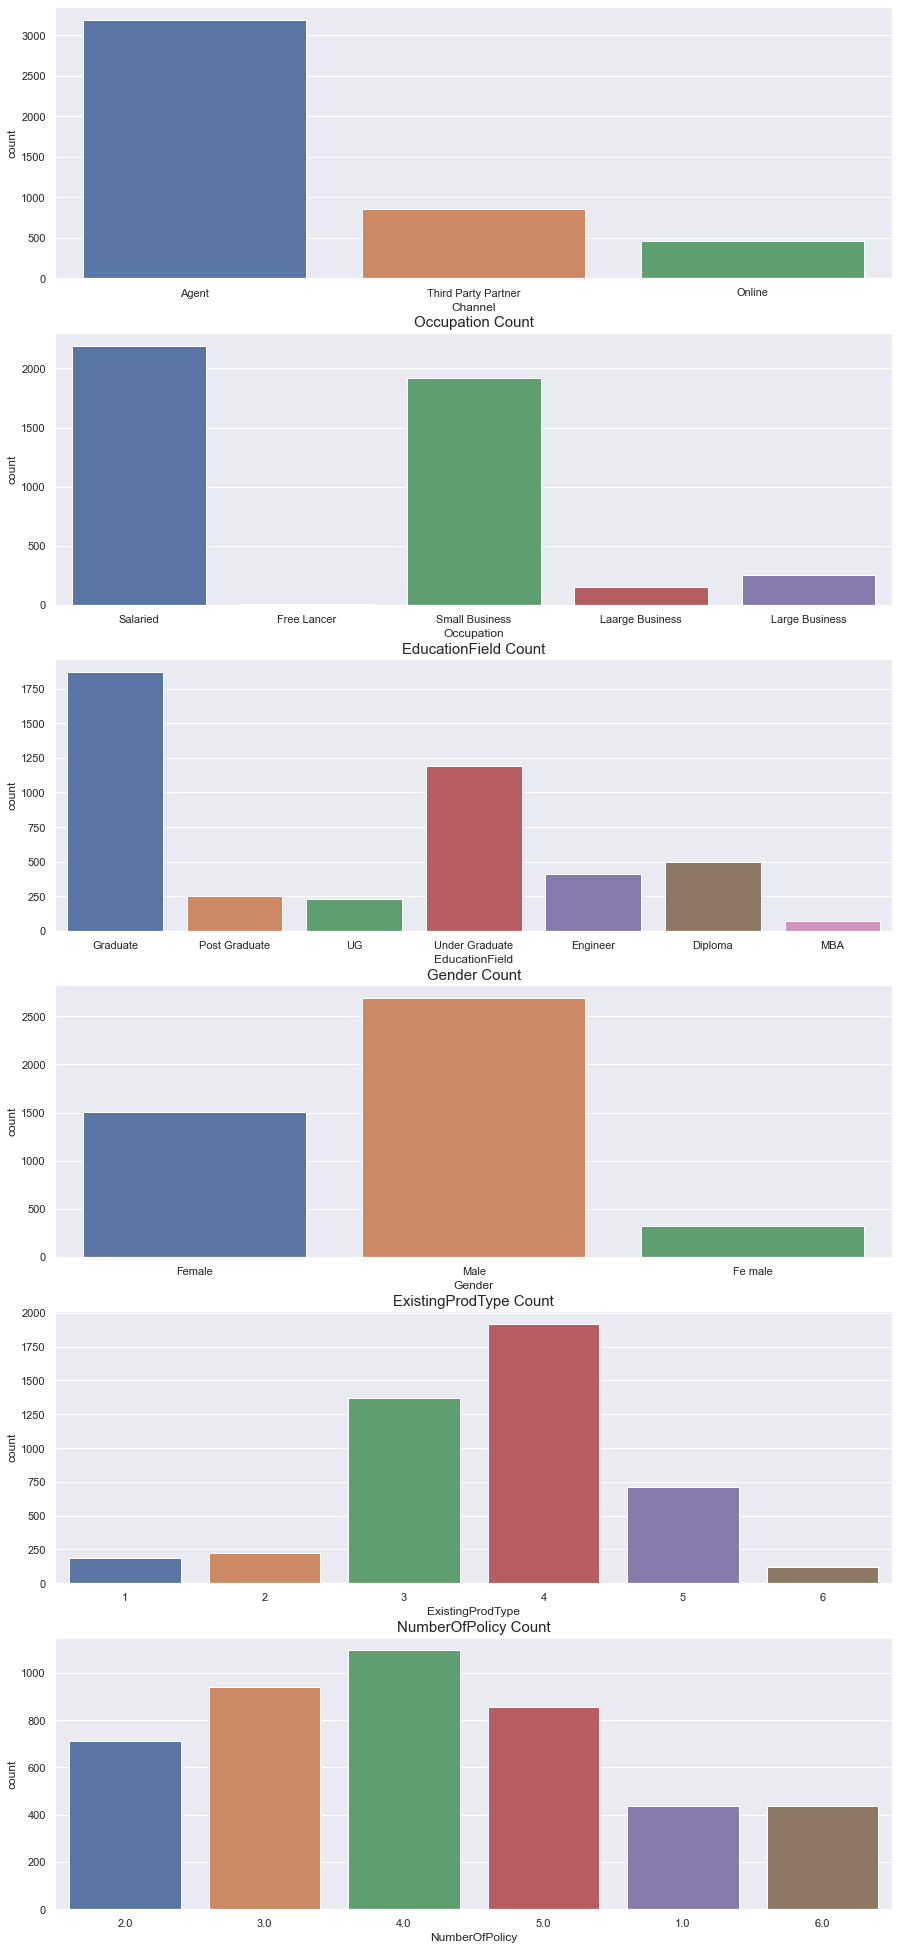

In [14]:
fig, axes = plt.subplots(nrows=6,ncols=1)
fig.set_size_inches(15,35)
sns.countplot(df['Channel'] , ax=axes[0])
a.set_title("Channel Count",fontsize=15)

a = sns.countplot(df['Occupation'] , ax=axes[1])
a.set_title("Occupation Count",fontsize=15)

a = sns.countplot(df['EducationField'] , ax=axes[2])
a.set_title('EducationField Count',fontsize=15)

a = sns.countplot(df['Gender'] , ax=axes[3])
a.set_title("Gender Count",fontsize=15)

a = sns.countplot(df['ExistingProdType'] , ax=axes[4])
a.set_title("ExistingProdType Count",fontsize=15)

a = sns.countplot(df['NumberOfPolicy'] , ax=axes[5])
a.set_title("NumberOfPolicy Count",fontsize=15)

plt.show();

In [15]:
df['Occupation'].value_counts()

Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: Occupation, dtype: int64

In [16]:
df['Occupation'] = df['Occupation'].replace({'Laarge Business' : 'Large Business'})

In [17]:
df['Occupation'].value_counts()

Salaried          2192
Small Business    1918
Large Business     408
Free Lancer          2
Name: Occupation, dtype: int64

In [18]:
df['EducationField'].value_counts()

Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: EducationField, dtype: int64

In [19]:
df['EducationField'] = df['EducationField'].replace({'Under Graduate' : 'UG'})

In [20]:
df['EducationField'].value_counts()

Graduate         1870
UG               1420
Diploma           496
Engineer          408
Post Graduate     252
MBA                74
Name: EducationField, dtype: int64

In [21]:
df['Gender'] = df['Gender'].replace({'Fe male' : 'Female'})

In [22]:
df['Gender'].value_counts()

Male      2688
Female    1832
Name: Gender, dtype: int64

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\si

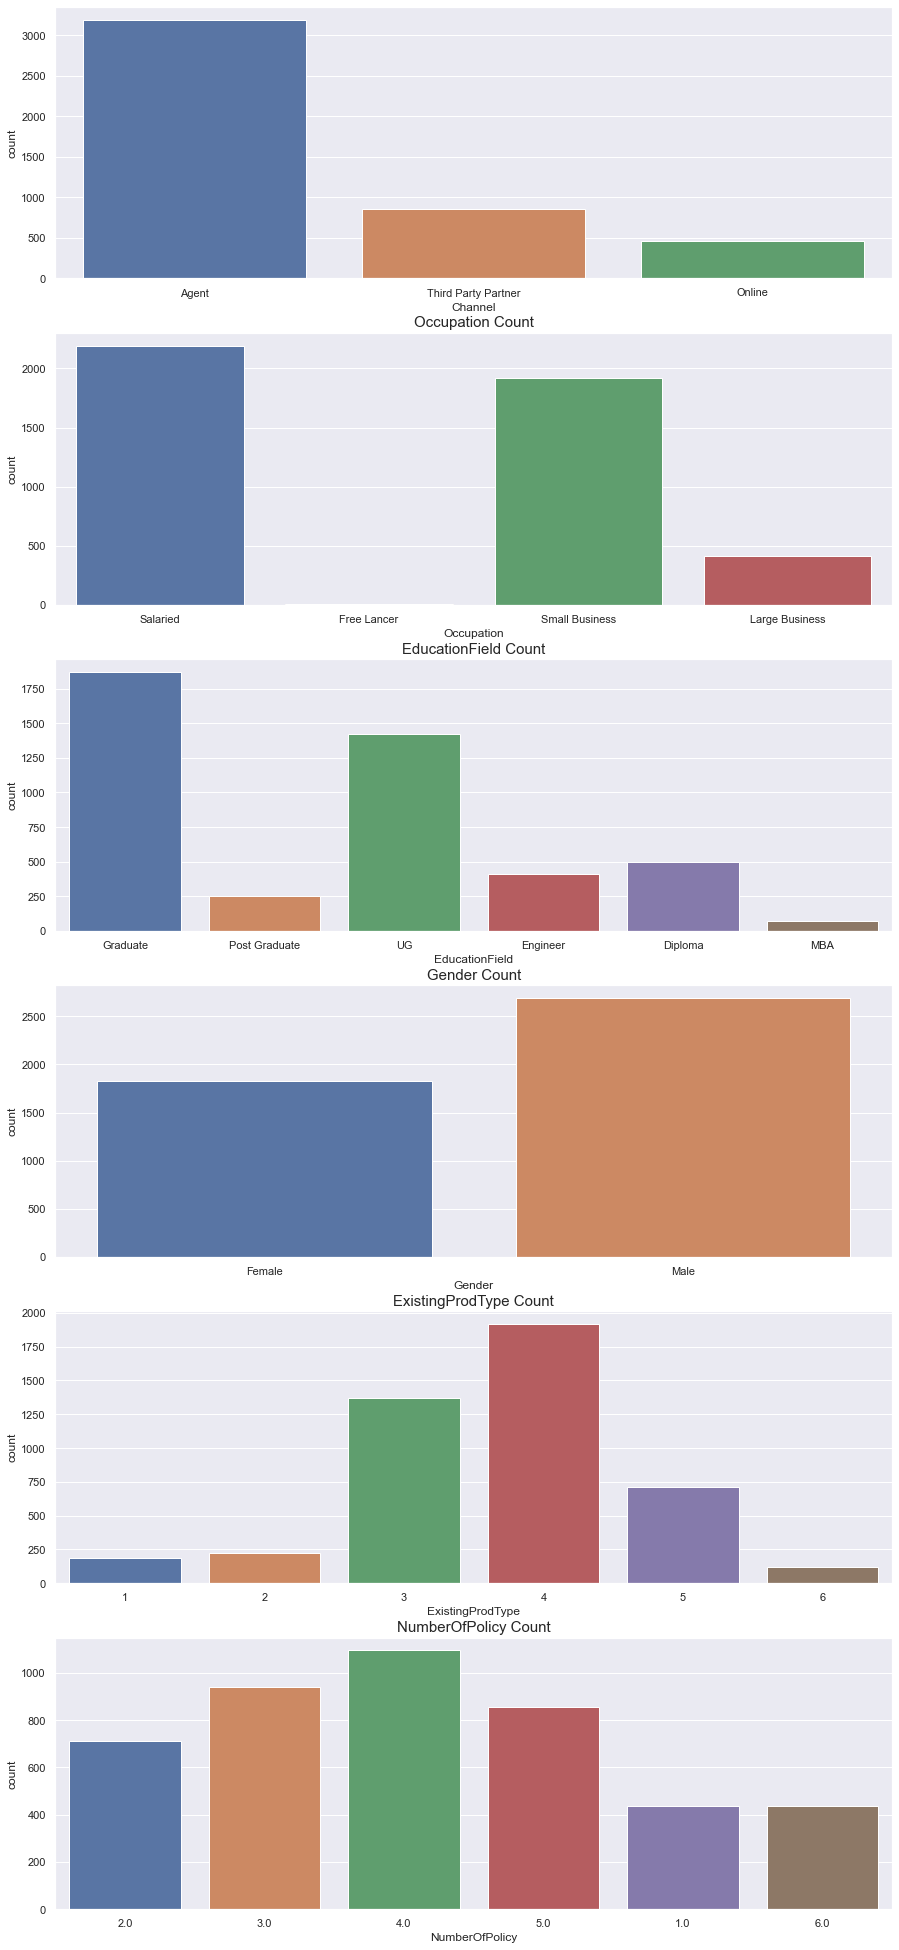

In [23]:
fig, axes = plt.subplots(nrows=6,ncols=1)
fig.set_size_inches(15,35)
sns.countplot(df['Channel'] , ax=axes[0])
a.set_title("Channel Count",fontsize=15)

a = sns.countplot(df['Occupation'] , ax=axes[1])
a.set_title("Occupation Count",fontsize=15)

a = sns.countplot(df['EducationField'] , ax=axes[2])
a.set_title('EducationField Count',fontsize=15)

a = sns.countplot(df['Gender'] , ax=axes[3])
a.set_title("Gender Count",fontsize=15)

a = sns.countplot(df['ExistingProdType'] , ax=axes[4])
a.set_title("ExistingProdType Count",fontsize=15)

a = sns.countplot(df['NumberOfPolicy'] , ax=axes[5])
a.set_title("NumberOfPolicy Count",fontsize=15)

plt.show();

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\si

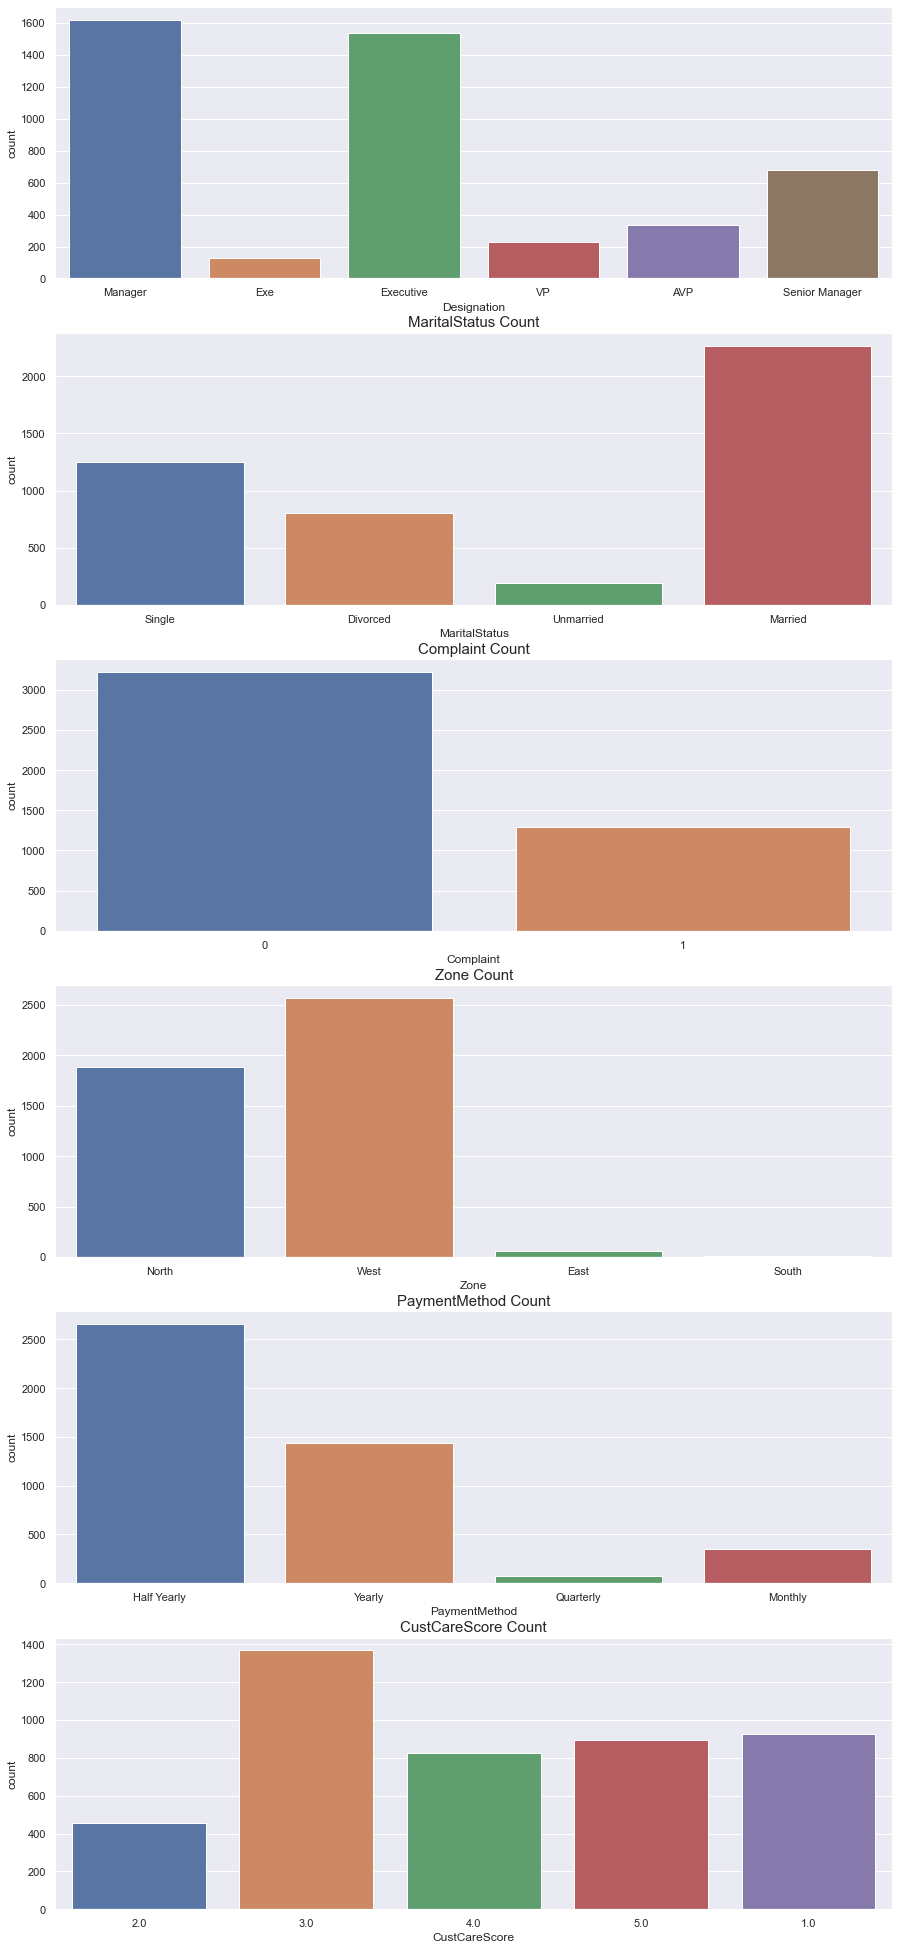

In [24]:
fig, axes = plt.subplots(nrows=6,ncols=1)
fig.set_size_inches(15,35)
sns.countplot(df['Designation'] , ax=axes[0])
a.set_title("Designation Count",fontsize=15)

a = sns.countplot(df['MaritalStatus'] , ax=axes[1])
a.set_title("MaritalStatus Count",fontsize=15)

a = sns.countplot(df['Complaint'] , ax=axes[2])
a.set_title('Complaint Count',fontsize=15)

a = sns.countplot(df['Zone'] , ax=axes[3])
a.set_title("Zone Count",fontsize=15)

a = sns.countplot(df['PaymentMethod'] , ax=axes[4])
a.set_title("PaymentMethod Count",fontsize=15)

a = sns.countplot(df['CustCareScore'] , ax=axes[5])
a.set_title("CustCareScore Count",fontsize=15)

plt.show();

In [25]:
df['Designation'].value_counts()

Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: Designation, dtype: int64

In [26]:
df['Designation'] = df['Designation'].replace({'Exe' : 'Executive'})

In [27]:
df['Designation'].value_counts()

Executive         1662
Manager           1620
Senior Manager     676
AVP                336
VP                 226
Name: Designation, dtype: int64

In [28]:
df['MaritalStatus'].value_counts()

Married      2268
Single       1254
Divorced      804
Unmarried     194
Name: MaritalStatus, dtype: int64

In [29]:
df['MaritalStatus'] = df['MaritalStatus'].replace({'Single' : 'Unmarried'})

In [30]:
df['MaritalStatus'].value_counts()

Married      2268
Unmarried    1448
Divorced      804
Name: MaritalStatus, dtype: int64

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\si

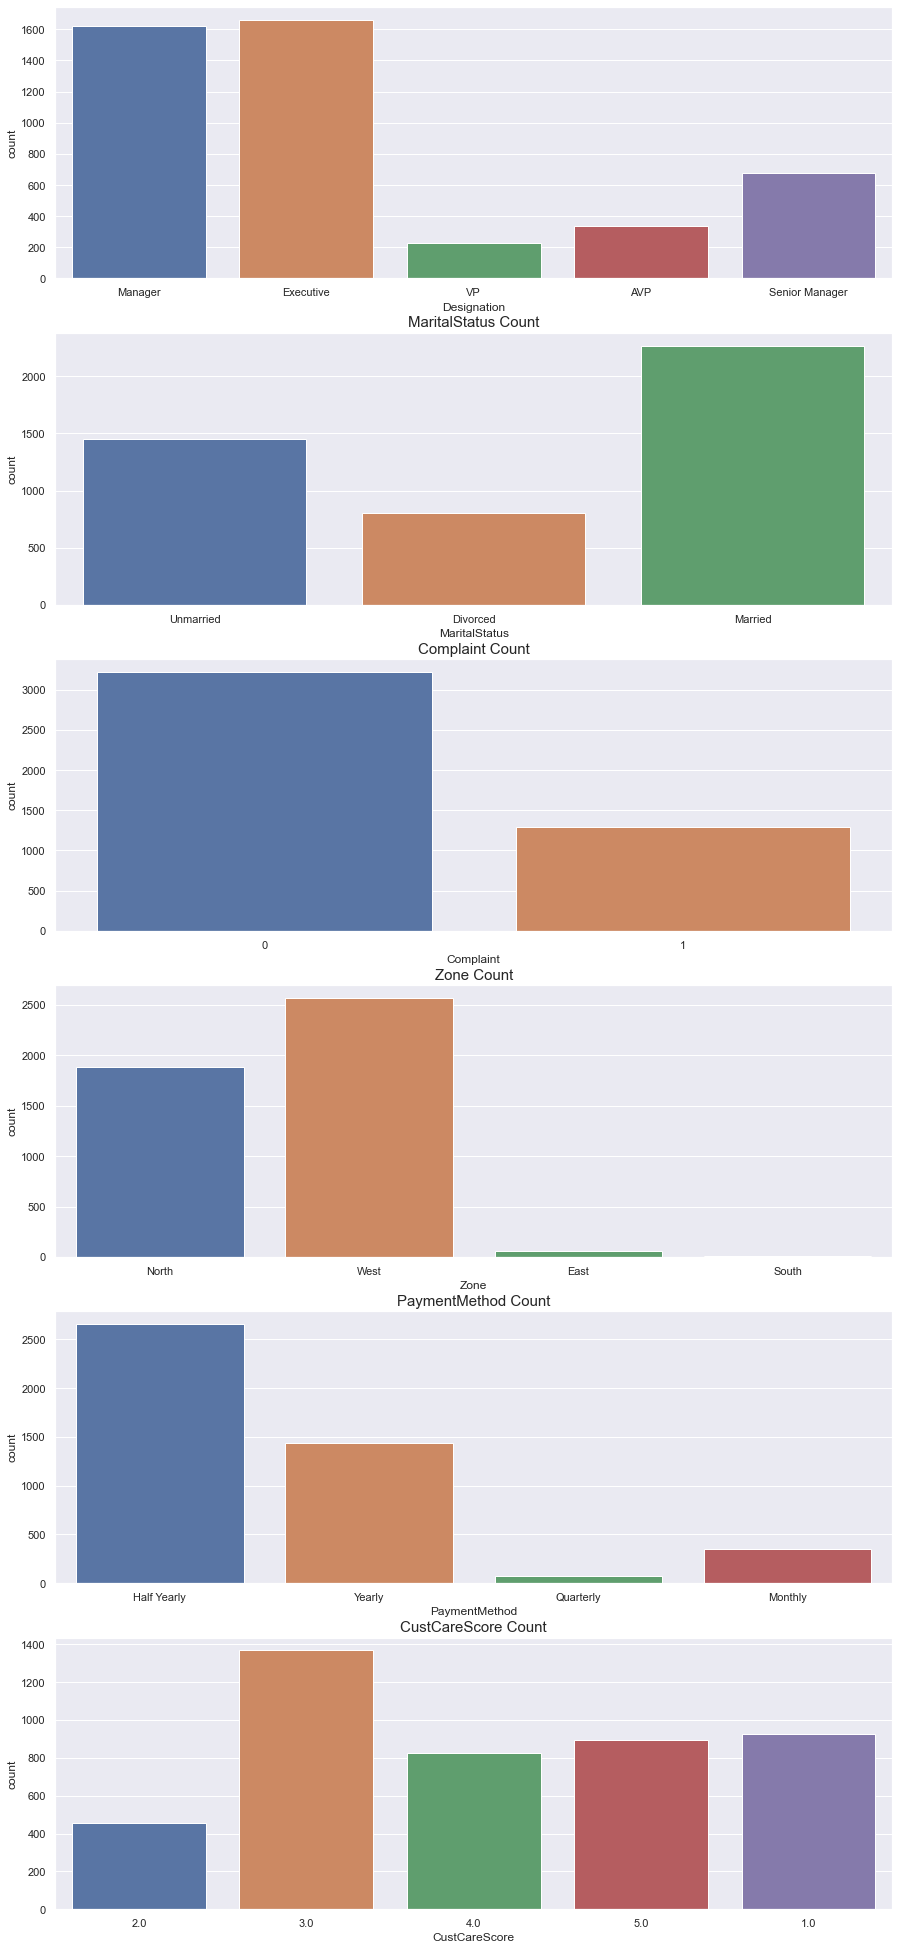

In [31]:
fig, axes = plt.subplots(nrows=6,ncols=1)
fig.set_size_inches(15,35)
sns.countplot(df['Designation'] , ax=axes[0])
a.set_title("Designation Count",fontsize=15)

a = sns.countplot(df['MaritalStatus'] , ax=axes[1])
a.set_title("MaritalStatus Count",fontsize=15)

a = sns.countplot(df['Complaint'] , ax=axes[2])
a.set_title('Complaint Count',fontsize=15)

a = sns.countplot(df['Zone'] , ax=axes[3])
a.set_title("Zone Count",fontsize=15)

a = sns.countplot(df['PaymentMethod'] , ax=axes[4])
a.set_title("PaymentMethod Count",fontsize=15)

a = sns.countplot(df['CustCareScore'] , ax=axes[5])
a.set_title("CustCareScore Count",fontsize=15)

plt.show();

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4251 non-null   float64
 2   CustTenure            4294 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   object 
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4475 non-null   object 
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4284 non-null   float64
 12  Complaint             4520 non-null   object 
 13  ExistingPolicyTenure  4336 non-null   float64
 14  SumAssured            4366 non-null   float64
 15  Zone                 

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


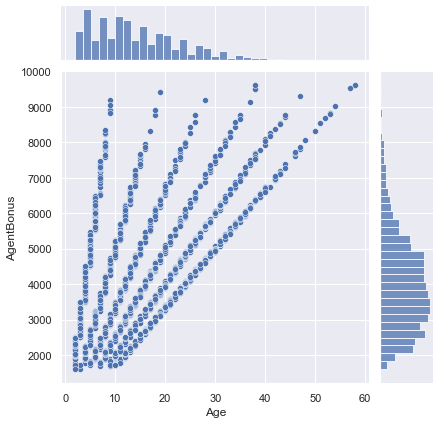

In [33]:
sns.jointplot(df['Age'], df['AgentBonus']);

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


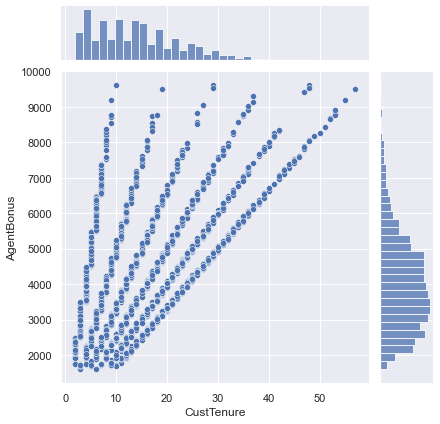

In [34]:
sns.jointplot(df['CustTenure'], df['AgentBonus']);

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


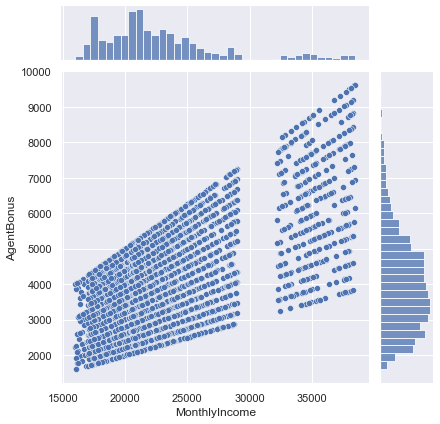

In [35]:
sns.jointplot(df['MonthlyIncome'], df['AgentBonus']);

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


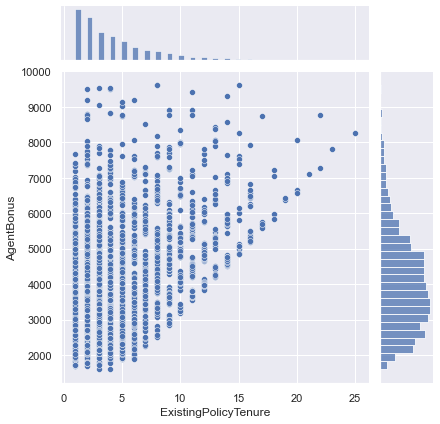

In [36]:
sns.jointplot(df['ExistingPolicyTenure'], df['AgentBonus']);

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


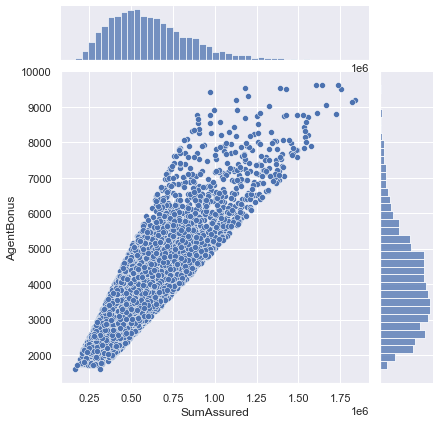

In [37]:
sns.jointplot(df['SumAssured'], df['AgentBonus']);

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


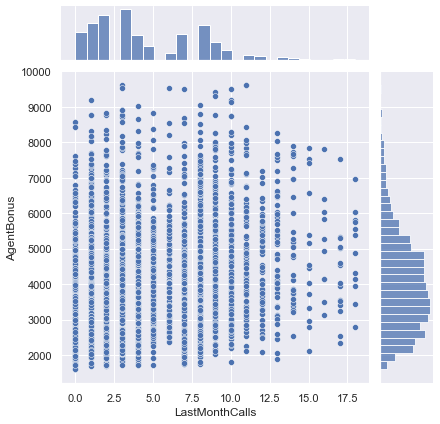

In [38]:
sns.jointplot(df['LastMonthCalls'], df['AgentBonus']);

<AxesSubplot:>

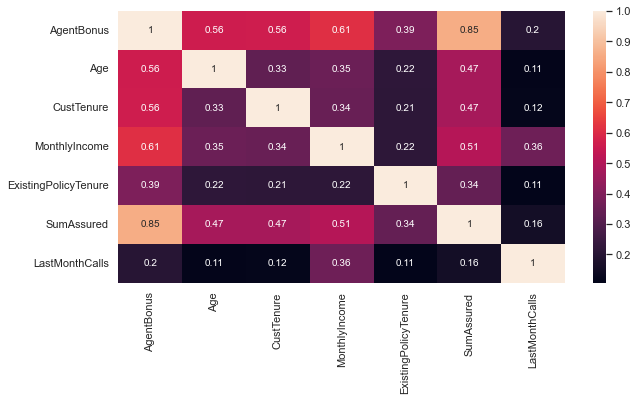

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [40]:
df.isnull().sum()

AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [41]:
for column in df[['Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured', 'CustCareScore' ]]:
    median = df[column].median()
    df[column] = df[column].fillna(median)

In [42]:
df.isnull().sum()

AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4520 non-null   float64
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   object 
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4520 non-null   float64
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4520 non-null   float64
 12  Complaint             4520 non-null   object 
 13  ExistingPolicyTenure  4520 non-null   float64
 14  SumAssured            4520 non-null   float64
 15  Zone                 

In [44]:
df = pd.get_dummies(df, columns=['Channel','Occupation','EducationField', 'Gender', 'ExistingProdType','Designation', 'MaritalStatus','Complaint', 'Zone','PaymentMethod'], drop_first=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AgentBonus                    4520 non-null   int64  
 1   Age                           4520 non-null   float64
 2   CustTenure                    4520 non-null   float64
 3   NumberOfPolicy                4520 non-null   float64
 4   MonthlyIncome                 4520 non-null   float64
 5   ExistingPolicyTenure          4520 non-null   float64
 6   SumAssured                    4520 non-null   float64
 7   LastMonthCalls                4520 non-null   int64  
 8   CustCareScore                 4520 non-null   float64
 9   Channel_Online                4520 non-null   uint8  
 10  Channel_Third Party Partner   4520 non-null   uint8  
 11  Occupation_Large Business     4520 non-null   uint8  
 12  Occupation_Salaried           4520 non-null   uint8  
 13  Occ

In [46]:
df.head()

,AgentBonus,Age,CustTenure,NumberOfPolicy,MonthlyIncome,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel_Online,...,Designation_VP,MaritalStatus_Married,MaritalStatus_Unmarried,Complaint_1,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,4409,22.0,4.0,2.0,20993.0,2.0,806761.0,5,2.0,0,...,0,0,1,1,1,0,0,0,0,0
1,2214,11.0,2.0,4.0,20130.0,3.0,294502.0,7,3.0,0,...,0,0,0,0,1,0,0,0,0,1
2,4273,26.0,4.0,3.0,17090.0,2.0,578976.5,0,3.0,0,...,0,0,1,1,1,0,0,0,0,1
3,1791,11.0,13.0,3.0,17909.0,2.0,268635.0,0,5.0,0,...,0,0,0,1,0,0,1,0,0,0
4,2955,6.0,13.0,4.0,18468.0,4.0,366405.0,2,5.0,0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
# Copy all the predictor variables into X dataframe
X = df.drop('AgentBonus', axis=1)

# Copy target into the y dataframe. 
y = df[['AgentBonus']]

In [48]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train

array([[0.26785714, 0.23636364, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.28571429, 0.21818182, 0.8       , ..., 0.        , 0.        ,
        1.        ],
       [0.44642857, 0.16363636, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.17857143, 0.18181818, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05357143, 0.05454545, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.21428571, 0.25454545, 0.2       , ..., 0.        , 0.        ,
        0.        ]])

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [53]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model=LinearRegression()
regression_model=regression_model.fit(X_train,y_train)

In [54]:
regression_model.coef_

array([[ 1.25168907e+03,  1.29850311e+03,  2.49402378e+01,
         6.19808968e+02,  8.92234977e+02,  5.68918178e+03,
        -7.21489390e+01,  3.20318931e+01,  2.46867007e+01,
         5.88734639e+00, -4.91935157e+02, -3.87433016e+02,
        -4.66876734e+02,  1.96848556e+01, -6.04778179e+01,
        -1.27163680e+02, -3.65955048e+01,  3.22257862e+00,
         2.47494249e+01,  8.89644813e+01, -1.06364491e+02,
        -3.99197354e-01,  6.42272499e+01,  7.00324740e+01,
        -4.81971863e+02, -4.31253419e+02, -2.17506901e+02,
         7.17865675e+00, -4.29180829e+01,  1.03276046e+01,
         4.00365859e+01,  8.03966168e+01,  2.34137362e+02,
         7.91352946e+01, -2.98276491e+01,  1.91183567e+01,
        -1.23472829e+02]])

In [55]:
# R square on training data
regression_model.score(X_train, y_train)

0.8128860428715281

In [56]:
# R square on testing data
regression_model.score(X_test, y_test)

0.7905486186944541

In [57]:
#RMSE on Training data
predicted_train= regression_model.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

611.2635886093237

In [58]:
#RMSE on Testing data
predicted_test= regression_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

628.3236728459599

In [59]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     393.6
Date:                Sat, 12 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:29:53   Log-Likelihood:                -26559.
No. Observations:                3390   AIC:                         5.319e+04
Df Residuals:                    3352   BIC:                         5.343e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2444.4128    477.711      5.117      0.0

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
DT_model = DecisionTreeRegressor(random_state=44)
DT_model = DT_model.fit(X_train,y_train)

In [62]:
DT_model.score(X_train, y_train)

1.0

In [63]:
DT_model.score(X_test, y_test)

0.6901892838425683

In [64]:
#RMSE on Training data
predicted_train= DT_model.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

0.0

In [65]:
#RMSE on Testing data
predicted_test= DT_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

764.1700738513067

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
RFregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFregressor = DT_model.fit(X_train,y_train)

In [68]:
RFregressor.score(X_train, y_train)

1.0

In [69]:
RFregressor.score(X_test, y_test)

0.6901892838425683

In [70]:
#RMSE on Training data
predicted_train= RFregressor.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

0.0

In [71]:
#RMSE on Testing data
predicted_test= RFregressor.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

764.1700738513067

In [72]:
from sklearn.svm import SVR

In [73]:
SVregressor = SVR(kernel = 'rbf')
SVregressor = SVregressor.fit(X_train,y_train)

C:\Users\Sumit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
SVregressor.score(X_train, y_train)

0.007829167162054618

In [75]:
SVregressor.score(X_test, y_test)

0.005903593671877871

In [76]:
#RMSE on Training data
predicted_train= SVregressor.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

1407.5656600603415

In [77]:
#RMSE on Testing data
predicted_test= SVregressor.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

1368.8506296971805

In [78]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [80]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

C:\Users\Sumit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [81]:
print(" Results from Grid Search " )
print()
print("\n The best estimator across ALL searched params:\n",
          grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",
          grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",
          grid_GBR.best_params_)

 Results from Grid Search 


 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=8, n_estimators=500,
                          subsample=0.5)

 The best score across ALL searched params:
 0.8570316941786322

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}
